# OVERVIEW OF MOTOR VEHICLE CRASHES

In [1]:
%pip install kaleido
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import openpyxl
import geopandas
from shapely import wkt
import plotly.express as px
import analysis as a
import warnings
import math
%pip install kaleido
import kaleido

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
total_fatalities = pd.read_excel('data/figure1.xls')
total_fatalities.head()

Year  Total Fatalities  Vehicle Miles Traveled (VMT) Millions  \
0  1899                26                                    NaN   
1  1900                36                                    NaN   
2  1901                54                                    NaN   
3  1902                79                                    NaN   
4  1903               117                                    NaN   

   Fatality Rate per 100 Million VMT  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN

### OVERALL TRENDS

#### 1. Fatalities and Fatality Rate per 100 Million VMT, 1975-2019

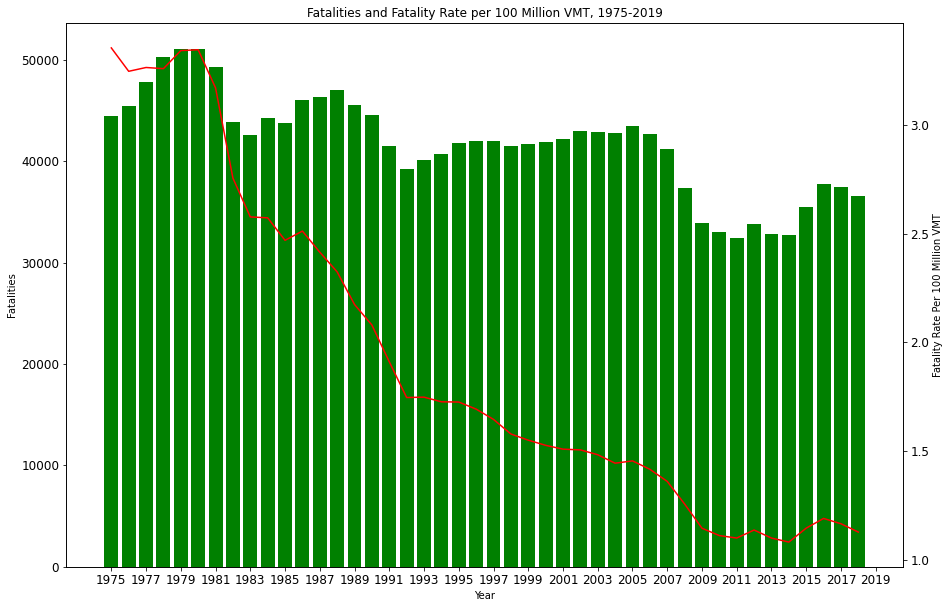

In [3]:
total_fatalities_sliced = total_fatalities[total_fatalities['Year']>=1975]
start_year = int(total_fatalities_sliced.iloc[0][0])
graph_details = {"start_year": start_year, "xlabel": "Year", "ylabel": "Fatalities", "line_bar_key": "Fatality" }

a.bar_line_chart(total_fatalities_sliced, graph_details)

##### This graph shows two overlapping plots. The green barchart shows the count of the number of fatalities over the years. The red line chart shows the fatality rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent high of 37806 in 2016, the number and rate of fatalities have been decreasing

#### 2. People Injured and Injury Rate per 100 Million VMT, 1988-2019

In [4]:
injuries = pd.read_excel('data/injuries.xlsx' , header = 4)
injuries.rename(columns={"Injured": "Total Injuries"}, inplace = True)
injuries["Year"] = pd.to_numeric(injuries["Year"])
injury_rate = injuries[["Year", "Injury Rate per 100 Million VMT"]]

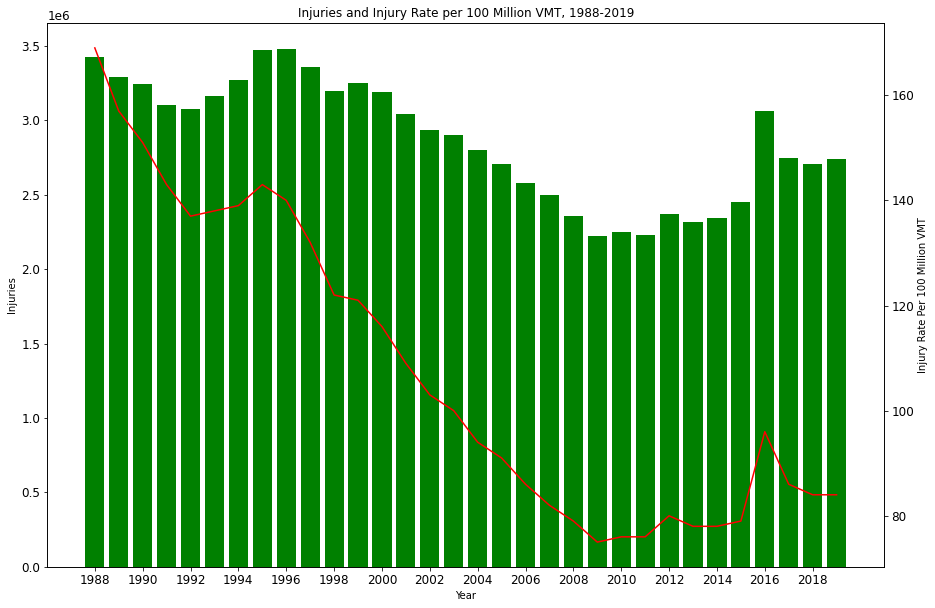

In [5]:
start_year = int(injuries.iloc[0][0])
graph_details = {"start_year": start_year, "xlabel": "Year", "ylabel": "Injuries", "line_bar_key": "Injury" }

a.bar_line_chart(injuries, graph_details)

##### This graph shows two overlapping plots. The black barchart shows the count of the number of people injured over the years. The yellow line chart shows the injury rate per 100 Million VMT (Vehicle Miles Travlled) and how in the recent years after reaching a recent peak of 3,240,000 in 2016, the number and rate of fatalities have been decreasing.

#### From the above graphs, we observe a common anomaly. 2016 was the deadliest year recently. Let us try and analyse why is that the case.


In [6]:
gasoline_prices = pd.read_excel("data/gasoline_prices.xlsx")

In [7]:
gasoline_prices = gasoline_prices.iloc[10:]
price_vs_injuries  = pd.merge(gasoline_prices, injury_rate, on = "Year")
price_vs_injuries.head()

Year  Average Gasoline Prices by Year  Injury Rate per 100 Million VMT
0  1988                            0.964                              169
1  1989                            1.060                              157
2  1990                            1.217                              151
3  1991                            1.196                              143
4  1992                            1.190                              137

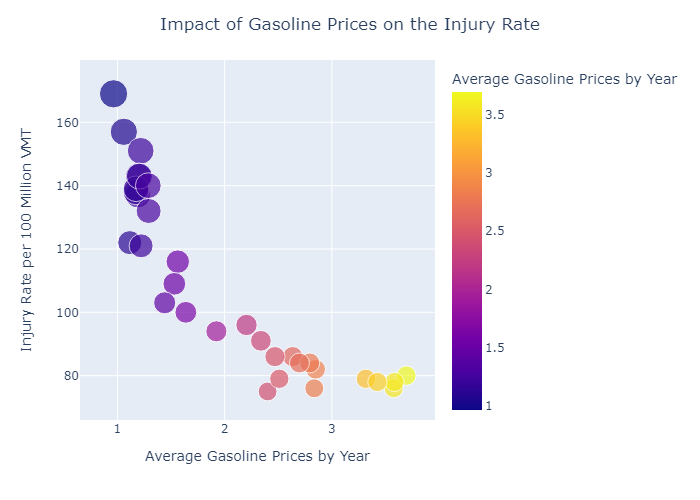

In [8]:
fig = px.scatter(price_vs_injuries, x="Average Gasoline Prices by Year", y="Injury Rate per 100 Million VMT", color="Average Gasoline Prices by Year",
                 size='Injury Rate per 100 Million VMT', hover_data=['Year'])
fig.update_layout(title_text='Impact of Gasoline Prices on the Injury Rate', title_x=0.5)
fig.show()
fig.show("png")

#### From the scatter plot it is clear that the years where the gasoline prices are low there are more injuries because people tend to travel more. This naturally, leads to more accidents.

### People Killed and Injured, by Person Type

#### 3. Fatality Composition, by Person Type, 2010 and 2019

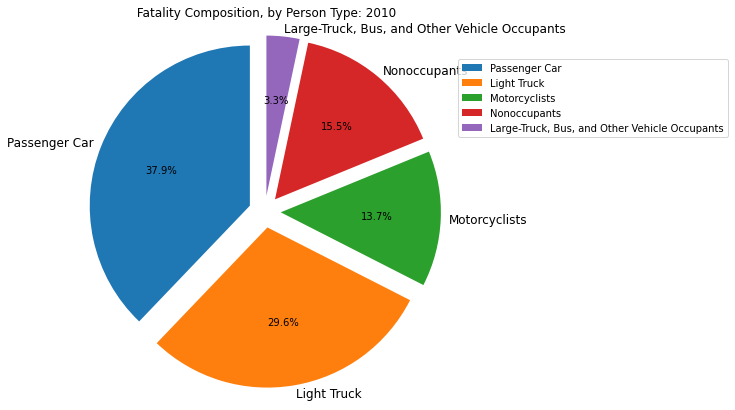

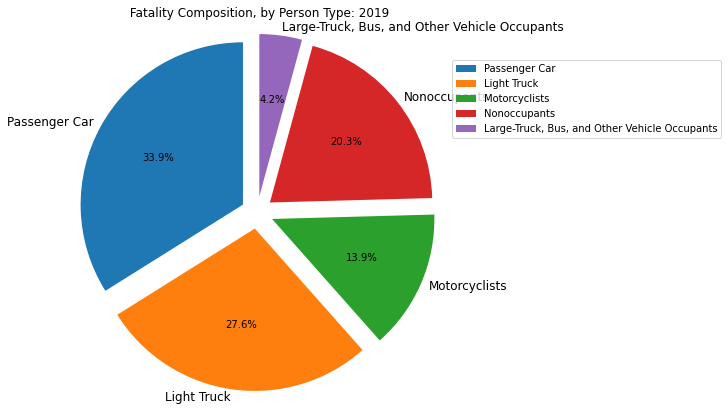

In [9]:
xlfile=["data/2010/TSF_Table_65.xlsx", "data/2019/TSF_Table_65.xlsx"]
xlfile1 = ["data/2010/TSF_Table_54.xlsx", "data/2019/TSF_Table_54.xlsx"]

for i in range(len(xlfile)):
    df = pd.read_excel(xlfile[i],engine='openpyxl', header=4, usecols=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
    df.fillna(method='ffill', inplace=True)
    df.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
#     print(df)
    for j in range(len(xlfile1)):
        if i==j:
            try:
                df1 = pd.read_excel(xlfile1[j],engine='openpyxl', header=3, usecols=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
                df1.fillna(method='ffill', inplace=True)
                df1.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
                df = pd.concat([df,df1], axis=0)
                total_killed = a.values(df)
                total_killed['Large-Truck, Bus, and Other Vehicle Occupants'] = total_killed['Large Truck']+total_killed['Bus']+ total_killed['Other/Unknown\nVehicle']
                del total_killed['Large Truck'], total_killed['Bus'],total_killed['Other/Unknown\nVehicle']
                year=xlfile[i][5:9]
                a.plotpie(total_killed, year)
            except ValueError:
                df1 = pd.read_excel(xlfile1[j],engine='openpyxl', header=4, usecols=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
                df1.fillna(method='ffill', inplace=True)
                df1.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
                df = pd.concat([df,df1], axis=0)
                total_killed = a.values(df)
                total_killed['Large-Truck, Bus, and Other Vehicle Occupants'] = total_killed['Large Truck']+total_killed['Bus']+ total_killed['Other/Unknown\nVehicle']
                del total_killed['Large Truck'], total_killed['Bus'],total_killed['Other/Unknown\nVehicle']
                year=xlfile[i][5:9]
                a.plotpie(total_killed, year)
                

##### Non occupants include Pedestrians, Pedalcyclistes, and other non occupants. The above pie chart shows the fatalities occured depending on the person type, (such as car occupants, large -truck, bus occupants, pedalcyclists etc) from 2010 and 2019. Assuming same comparison between 2010 and 2019, the biggest change is seen in the percentage of non occupant fatalities from 15% to 20%;and there is a small decrease in the passenger car and light truck occupant fatalities. 

#### 4. Proportion of Fatalities Inside/Outside Vehicle, 1975-2019

In [10]:
proportion_of_fatalities = pd.read_excel("data/figure4.xlsx" , header = 4)
proportion_of_fatalities.head()

Injury Severity  Year  Passenger Cars  Light Trucks  Large Trucks  Buses  \
0          Killed  1975           25929          4856           961     53   
1          Killed  1976           26166          5438          1132     73   
2          Killed  1977           26782          5976          1287     42   
3          Killed  1978           28153          6745          1395     41   
4          Killed  1979           27808          7178          1432     39   

   Other/Unknown  Occupants Total  Motorcycles  Pedestrians  Pedalcyclists  \
0            937            32736         3189         7516           1003   
1            981            33790         3312         7427            914   
2            959            35046         4104         7732            922   
3            622            36956         4577         7795            892   
4            579            37036         4894         8096            932   

   Other/Unknown Nonoccupants  nonoccupants Total  Total  
0                          81                8600  44525  
1                          80                8421  45523  
2                          74                8728  47878  
3                         111                8798  50331  
4                         135                9163  51093

In [11]:
proportion_of_fatalities = proportion_of_fatalities.loc[proportion_of_fatalities["Injury Severity"] == "Killed"]
proportion_of_fatalities["Inside Vehicle"] = proportion_of_fatalities["Occupants Total"]/proportion_of_fatalities["Total"]*100
proportion_of_fatalities["Outside Vehicle"] = 100 - proportion_of_fatalities["Inside Vehicle"]
proportion_of_fatalities = proportion_of_fatalities[["Year", "Occupants Total", "nonoccupants Total", "Total", "Inside Vehicle", "Outside Vehicle"]]

In [12]:
pedestrians = pd.read_excel("data/pedestrians_fatal.xlsx", usecols = ["Crash Date (Year)", "Total"])
pedestrians = pedestrians.rename(columns={"Crash Date (Year)": "Year", "Total": "Pedestrians_killed"})

In [13]:
pedestrians.head()

Year  Pedestrians_killed
0  2005                5313
1  2006                5169
2  2007                5053
3  2008                4788
4  2009                4453

In [14]:
proportion_of_fatalities = proportion_of_fatalities.merge(pedestrians,on='Year', how='left')

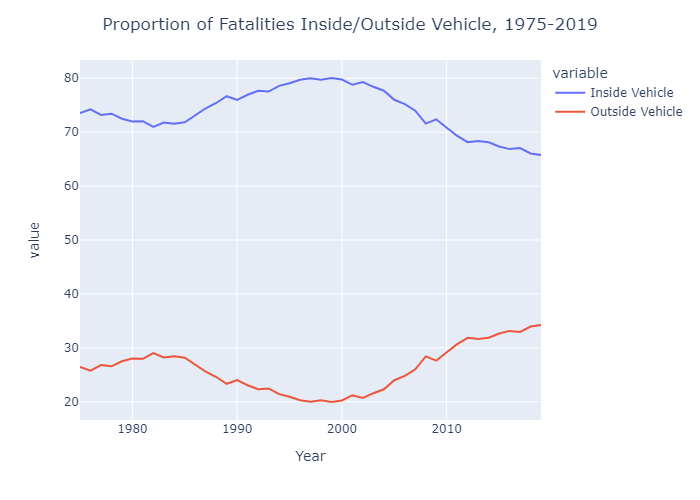

In [15]:
title_text = 'Proportion of Fatalities Inside/Outside Vehicle, 1975-2019'
a.plot_line(proportion_of_fatalities, 4, 6, title_text)

##### The above blue line chart shows that the percentage of people killed '"inside" the vehicle (occupants of the vehicle) has decreased from the recent peak in 1966 at about 80% to 66% in 2019.
##### The red line chart shows the percentage of people killed "outside" the vehicle (motorcyclists, pedestrians, pedalcyclists, other non occupants). The percentage has increased from 20% in 1966 to about 35% in 2019.

In [16]:
fatalities_since_2005 = proportion_of_fatalities[proportion_of_fatalities["Year"]>=2005].copy()

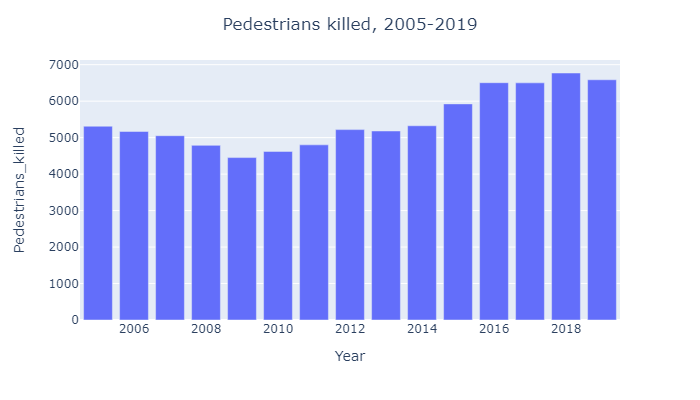

In [17]:
# data_canada = data[data.country == 'Canada']
fig = px.bar(fatalities_since_2005, x='Year', y='Pedestrians_killed',
             hover_data=['nonoccupants Total','Outside Vehicle'], height=400)
fig.update_layout(title_text='Pedestrians killed, 2005-2019', title_x=0.5)
fig.show()
fig.show("png")

#### From the above graphs we observe that the number of pedestrians killed has increased significantly over the years and is a major contributor to the number of non-occupants that have been killed in accidents.

#### 5. Fatalities by Land Use 1975 - 2019

In [18]:
fatalities_by_land_use = pd.read_excel("data/figure5.xlsx")
fatalities_by_land_use = fatalities_by_land_use[["Year", "Urban Deaths", "Rural Deaths", "UD_Perct", "RD_Perct", "Total Deaths"]]

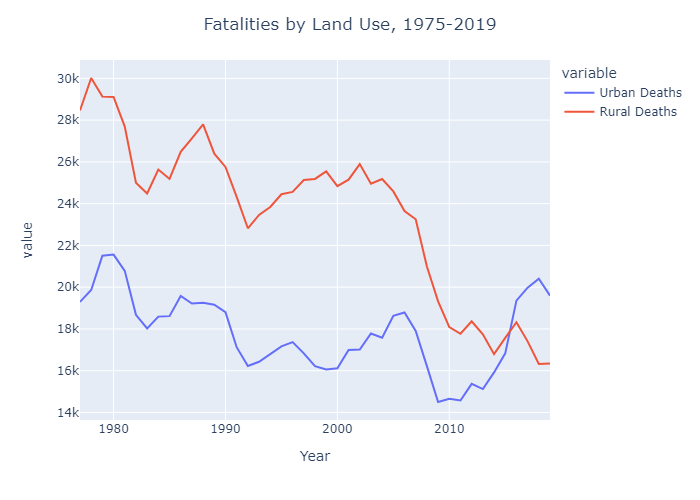

In [19]:
title_text = 'Fatalities by Land Use, 1975-2019'
a.plot_line(fatalities_by_land_use, 1, 3, title_text)
# fig = px.line(fatalities_by_land_use, x="Year", y= fatalities_by_land_use.columns[1:3])
# fig.show()

##### The above graph shows that the number of fatalities have usually been greater for the rural area until 2016, where the number of fatalities in urban area were greater than the rural area.
##### In the past year, there has been a slight decrease in the number of urban fatalities (~4%) and slight increase (~0.1%) in rural fatalities. Overall, the count of urban fatalities is still greater than the rural fatalities.

### Traffic Fatalities and Percentage Changes based on User input for year, by State

In [20]:
traffic_fatalities = {}
traffic_fatalities_normalized = {}
for year in range(2011, 2020):
    crash = a.read_file(year, "CRASH")
    vehicle = a.read_file_excel(year, "vehicle", head = 5)
    vehicle = vehicle[["Unnamed: 0", "Unnamed: 15"]]
    vehicle = vehicle.drop([51,52])
    vehicle = vehicle.rename(columns = {"Unnamed: 0": "States", "Unnamed: 15": "Total_Vehicle{}".format(year)})
    crash = crash.drop([0,1,2,3,59,58,57,56,55])
    crash = crash.rename(columns = {"Table 106": "NAME", "Unnamed: 1": "fatalities{}" .format(year-1) , 
                            "Unnamed: 2": "fatalities{}".format(year) ,
                        "Unnamed: 3": "% Change{}".format(year)})
    crash["fatalities{}".format(year)] = crash["fatalities{}".format(year)].str.replace(',', '').astype(int)
    crash.reset_index(inplace = True)
    crash = crash.drop("index",axis =1)  
    crash_vehicle = crash.join(vehicle)
    crash_vehicle["Total_Vehicle{}".format(year)] = crash_vehicle["Total_Vehicle{}".format(year)].replace(',', '').astype(int)
    crash_vehicle["Normalized_Fatalities{}".format(year)] = crash_vehicle["fatalities{}".format(year)] * 100000/crash_vehicle["Total_Vehicle{}".format(year)]
    crash_vehicle["Normalized_Fatalities{}".format(year)] = crash_vehicle["Normalized_Fatalities{}".format(year)].round(1)
    traffic_fatalities[year] = crash
    traffic_fatalities_normalized[year] = crash_vehicle

#### FOR NORMALIZED MAP

In [21]:
year = int(input("Enter the year:\n"))

Enter the year:
2018


In [22]:
states_shp = a.states_shape_merge(traffic_fatalities, year)
states_shp.head()

#referred this website for the shape file and plots : https://jcutrer.com/python/learn-geopandas-plotting-usmaps"

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      06  01779778  0400000US06    06     CA  California   00  403483823181   
1      12  00294478  0400000US12    12     FL     Florida   00  138903200855   
2      13  01705317  0400000US13    13     GA     Georgia   00  148963503399   
3      16  01779783  0400000US16    16     ID       Idaho   00  214045425549   
4      17  01779784  0400000US17    17     IL    Illinois   00  143794747023   

        AWATER     region                                           geometry  \
0  20483271881       West  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...   
1  31407883551  Southeast  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...   
2   4947080103  Southeast  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...   
3   2397728105       West  POLYGON Z ((-117.24303 44.39097 0.00000, -117....   
4   6200927458    Midwest  POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...   

  fatalities2017  fatalities2018 % Change2018  
0          3,884            3798           -2  
1          3,116            3135            1  
2          1,540            1505           -2  
3            245             234           -4  
4          1,090            1035           -5

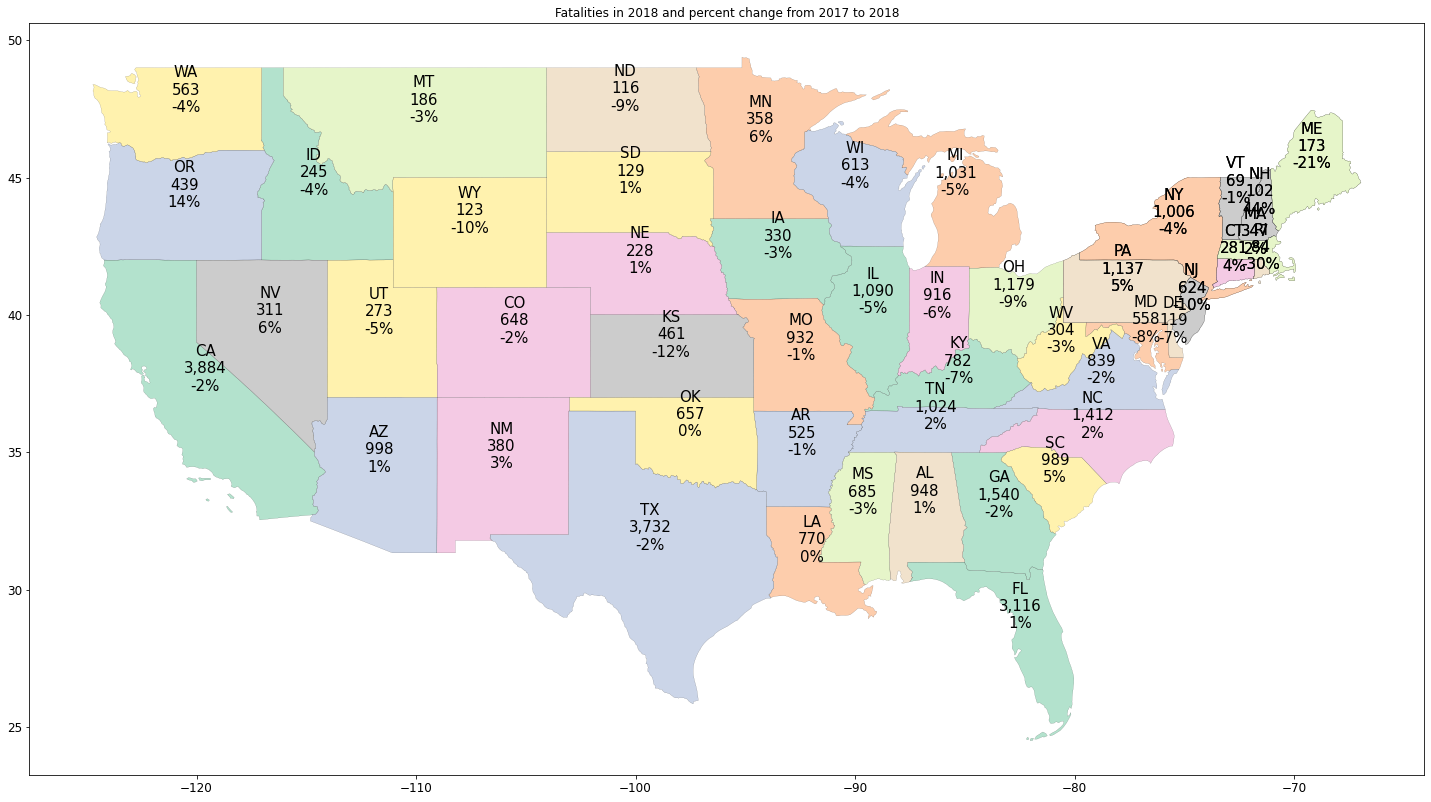

In [23]:
a.percent_change_plot(states_shp, "% Change", year)

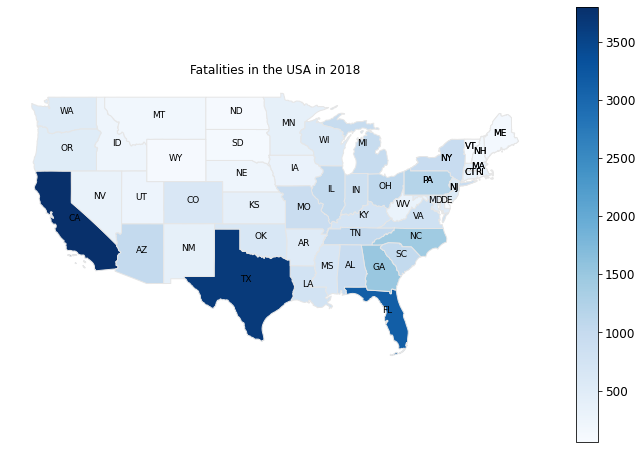

In [24]:
a.chloropleth(states_shp, "fatalities",  year)

In [25]:
# year = int(input("Enter the year:\n"))

In [26]:
states_shp = a.states_shape_merge(traffic_fatalities_normalized, year)
states_shp.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      06  01779778  0400000US06    06     CA  California   00  403483823181   
1      12  00294478  0400000US12    12     FL     Florida   00  138903200855   
2      13  01705317  0400000US13    13     GA     Georgia   00  148963503399   
3      16  01779783  0400000US16    16     ID       Idaho   00  214045425549   
4      17  01779784  0400000US17    17     IL    Illinois   00  143794747023   

        AWATER     region                                           geometry  \
0  20483271881       West  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...   
1  31407883551  Southeast  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...   
2   4947080103  Southeast  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...   
3   2397728105       West  POLYGON Z ((-117.24303 44.39097 0.00000, -117....   
4   6200927458    Midwest  POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...   

  fatalities2017  fatalities2018 % Change2018       States  Total_Vehicle2018  \
0          3,884            3798           -2  California            31022327   
1          3,116            3135            1     Florida            17496001   
2          1,540            1505           -2     Georgia             8512550   
3            245             234           -4        Idaho            1879670   
4          1,090            1035           -5    Illinois            10588909   

   Normalized_Fatalities2018  
0                       12.2  
1                       17.9  
2                       17.7  
3                       12.4  
4                        9.8

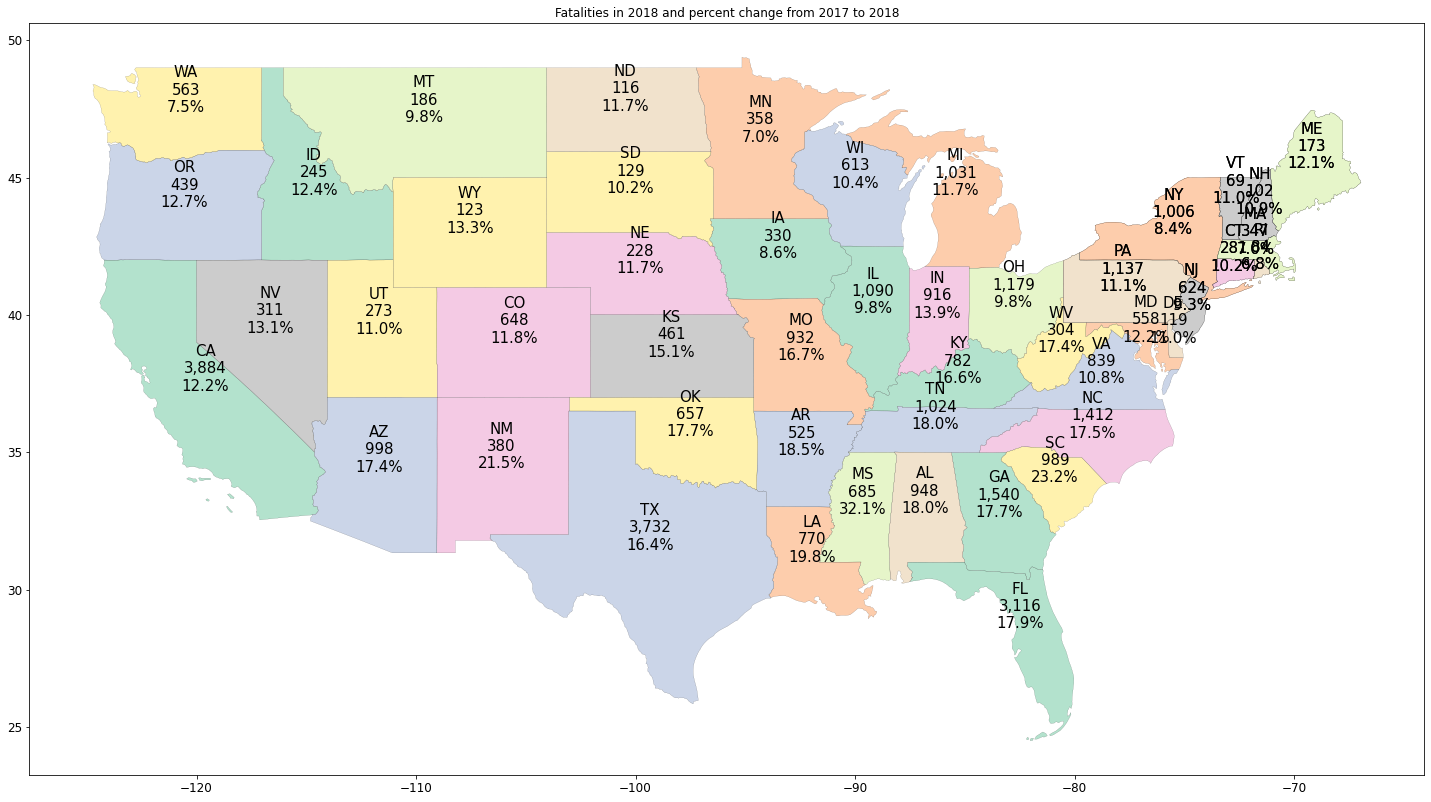

In [27]:
a.percent_change_plot(states_shp, "Normalized_Fatalities", year)

##### The above graph depicts the nmber of fatalities in each state in the US. The percentage shows the percent change from the previous year. This particular graph depicts the change from 2014 to 2015 based on the user input, i.e. 2015. To create this graph we used a shape file for the map of USA and we merged this with our existing dataset which helped us get the output as shown.


#### Chloropleth Map of the above graph.

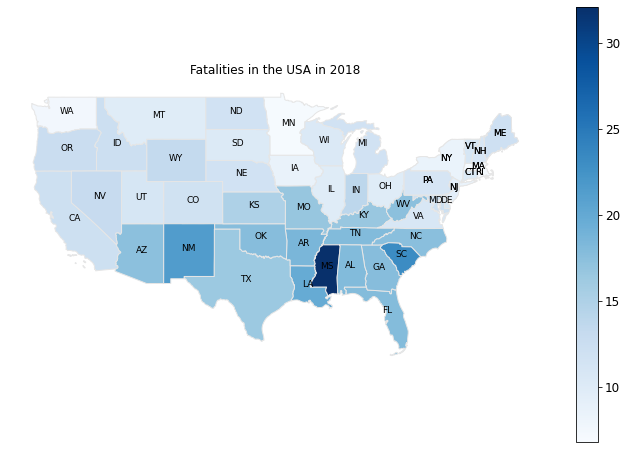

In [28]:
a.chloropleth(states_shp, "Normalized_Fatalities", year)

##### This graph clearly shows that California, Texas and Florida has the highest fatalities in 2015 (user input) as compared to the other states.

### Restraint use

In [29]:
restraint_use = pd.read_excel("data/restrain_type.xlsx", header = 4)

In [30]:
restraint_use.head()

Crash Severity  Year   Restrained Number  Restrained Percent  \
0          Fatal  1975                2580                 5.6   
1          Fatal  1976                2059                 4.5   
2          Fatal  1977                1895                 3.9   
3          Fatal  1978                1878                 3.6   
4          Fatal  1979                1680                 3.2   

   Unrestrained Number  Unrestrained Percent  Unknown Number  Unknown Percent  \
0                29713                  64.3           13931             30.1   
1                29908                  64.7           14239             30.8   
2                33013                  67.3           14154             28.8   
3                37610                  72.3           12510             24.1   
4                38326                  73.5           12123             23.3   

   Total Number  Percent  
0         46224      100  
1         46206      100  
2         49062      100  
3         51998      100  
4         52129      100

In [31]:
ru_fatal = restraint_use[restraint_use["Crash Severity"] == "Fatal"].copy()

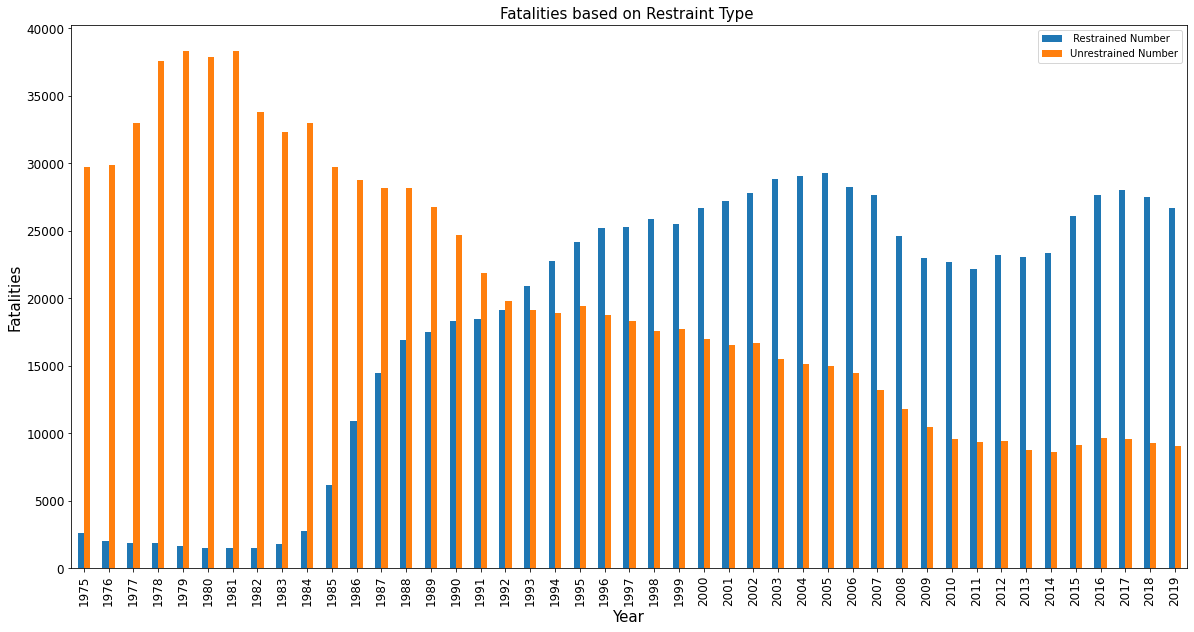

In [32]:
x = []
for i in range(1975, 2020,1):
    x.append(i)
X_axis = np.arange(len(ru_fatal))  
plt.rcParams['figure.figsize'] = [20, 10]
ru_fatal.plot(x="Year", y=[" Restrained Number", "Unrestrained Number"], kind="bar")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Fatalities", fontsize = 15)
plt.title("Fatalities based on Restraint Type ", fontsize = 15)
plt.show()

From the above graph we see that overall the total number of fatalities has been more or less the same (approx. 35000) however, we observe that from 1994, the number of unrestrained fatalities decreased and the number of restrained fatalities increased. The main purpose of this graph is to show that people began to take safety measures and used more restraints which helps reduce the severity of the fatality.

## HYPOTHESIS 1:

### There are more fatal crashes on weekends (Friday, Saturday, Sunday)

<BarContainer object of 2 artists>

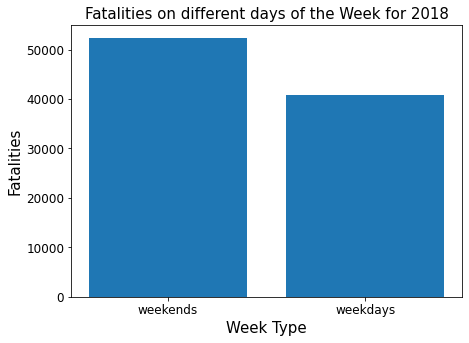

In [33]:
for i in range(2010,2020):
    fp = 'data/'+str(i) +'/'+str(i)+ '.xlsx'
    df = pd.read_excel(fp, header = 4)
    df.fillna(method='ffill', inplace=True)
    df1 = df[df["Crash Severity"] == "Fatal Crashes"].copy()
    df1.drop(['Crash Severity'], axis=1, inplace = True)
    if i == 2010:
        df2 = df1.copy()
    else:
        df2["Sunday"] += df1["Sunday"]
        df2["Monday"] += df1["Monday"]
        df2["Tuesday"] += df1["Tuesday"]
        df2["Wednesday"] += df1["Wednesday"]
        df2["Thursday"] += df1["Thursday"]
        df2["Friday"] += df1["Friday"]
        df2["Saturday"] += df1["Saturday"]
        df2["Total"] +=df1["Total"]
        
        
df3 = df2[df2["Time"] == "Total"].set_index("Time").T
df3.reset_index(inplace = True)
plot={}
plot['weekends'] = (df3["Total"][0] + df3["Total"][5] + df3["Total"][6])/3
plot['weekdays'] = (df3["Total"][1] + df3["Total"][2] + df3["Total"][3] + df3["Total"][4])/4
labels=['Weekdays', 'Weekends']
fig, ax = plt.subplots(figsize=(7,5))
plt.xlabel("Week Type", fontsize = 15)
plt.ylabel("Fatalities", fontsize = 15)
plt.title("Fatalities on different days of the Week for {}".format(year), fontsize = 15)
plt.bar(plot.keys(), plot.values())

## Hypothesis 2:

### Older models of car leads to more fatalities

In [34]:
dataframes_dict = {}
dataframes_dict_model = {}
dataframes_dict_drink = {}
dataframes_dict_airbag = {}
for year in range(2010,2020):
    person_year = a.read_file(year, "PERSON")
    accident_year = a.read_file(year, "ACCIDENT")
    accident_year = accident_year[['ST_CASE', 'DAY_WEEK']]
    person_year = person_year[["ST_CASE", "STATE","MAN_COLL","AIR_BAG","DRINKING", "INJ_SEV", "HOUR", "MOD_YEAR", 
                               "PER_TYP","SEAT_POS"]]
    drink_yes_no = person_year[["DRINKING", "INJ_SEV", "HOUR"]]
    model_death = person_year[["INJ_SEV", "MOD_YEAR"]]
    airbag = person_year[["PER_TYP","SEAT_POS", "AIR_BAG","DRINKING", "INJ_SEV"]]
    person_year =  person_year.merge(accident_year, on='ST_CASE', how='left')
    dataframes_dict[year] = person_year
    dataframes_dict_model[year] = model_death
    dataframes_dict_drink[year] = drink_yes_no
    dataframes_dict_airbag[year] = airbag


In [35]:
year = int(input("Enter the year:\n"))

Enter the year:
2018


<AxesSubplot:title={'center':'Fatalities associated with Model Type for 2018'}, xlabel='Model Type', ylabel='Fatalities'>

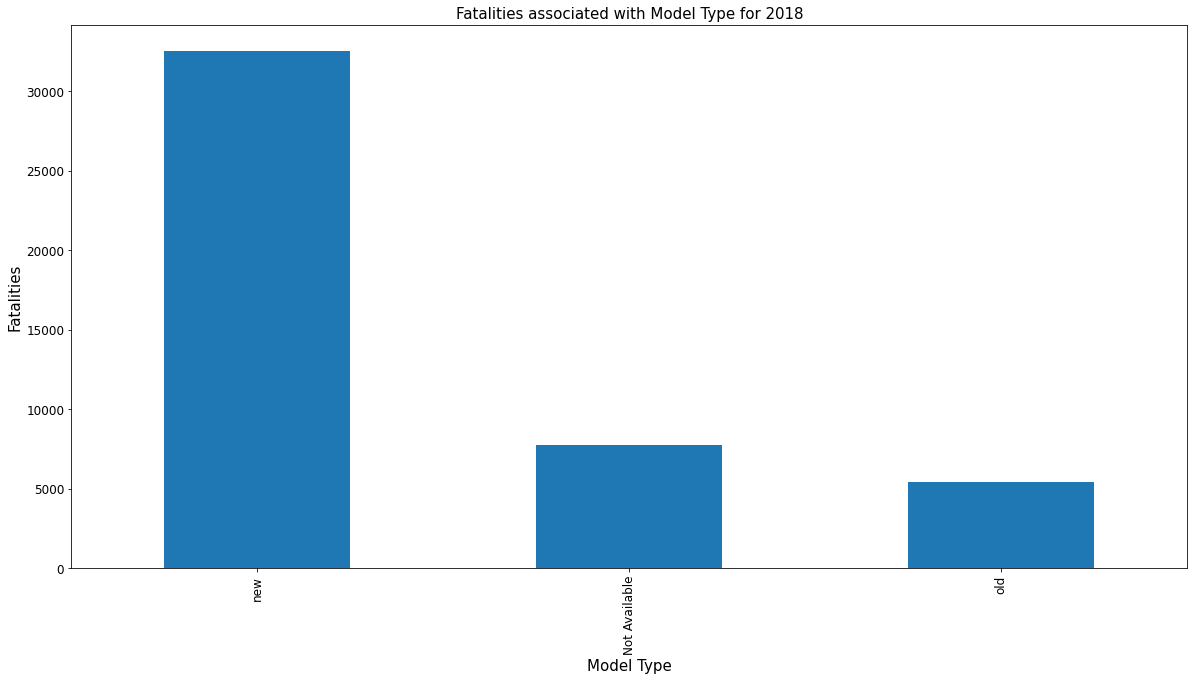

In [36]:
model_death = dataframes_dict_model[year] 
model_death = model_death[model_death["MOD_YEAR"]!=9999]
model_death = model_death[(model_death["INJ_SEV"] == 4) | (model_death["INJ_SEV"] == 2)]
model_death['segregation'] = 'Not Available'
# set multiple conditions and assign category with .loc
model_death.loc[(model_death['MOD_YEAR'] >= 1979) & (model_death['MOD_YEAR'] <= 2000), 'segregation'] = 'old'
model_death.loc[(model_death['MOD_YEAR'] >= 2000) & (model_death['MOD_YEAR'] <= 2019), 'segregation'] = 'new'
plt.xlabel("Model Type", fontsize = 15)
plt.ylabel("Fatalities", fontsize = 15)
plt.title("Fatalities associated with Model Type for {}".format(year), fontsize = 15)
model_death["segregation"].value_counts().plot(kind='bar')

## Hypothesis 3:

### Fatalities due to drunk driving is independent of time

In [37]:
drink_drive = dataframes_dict_drink[year] 
drink_drive = drink_drive[(drink_drive["INJ_SEV"] == 4) | (drink_drive["INJ_SEV"] == 2)]
drunk_drive_yes = drink_drive[drink_drive["DRINKING"]== 1]
drunk_drive_no = drink_drive[drink_drive["DRINKING"]== 0]
dict_times_drunk = a.group_by_time(drunk_drive_yes)
dict_times_not_drunk = a.group_by_time(drunk_drive_no)

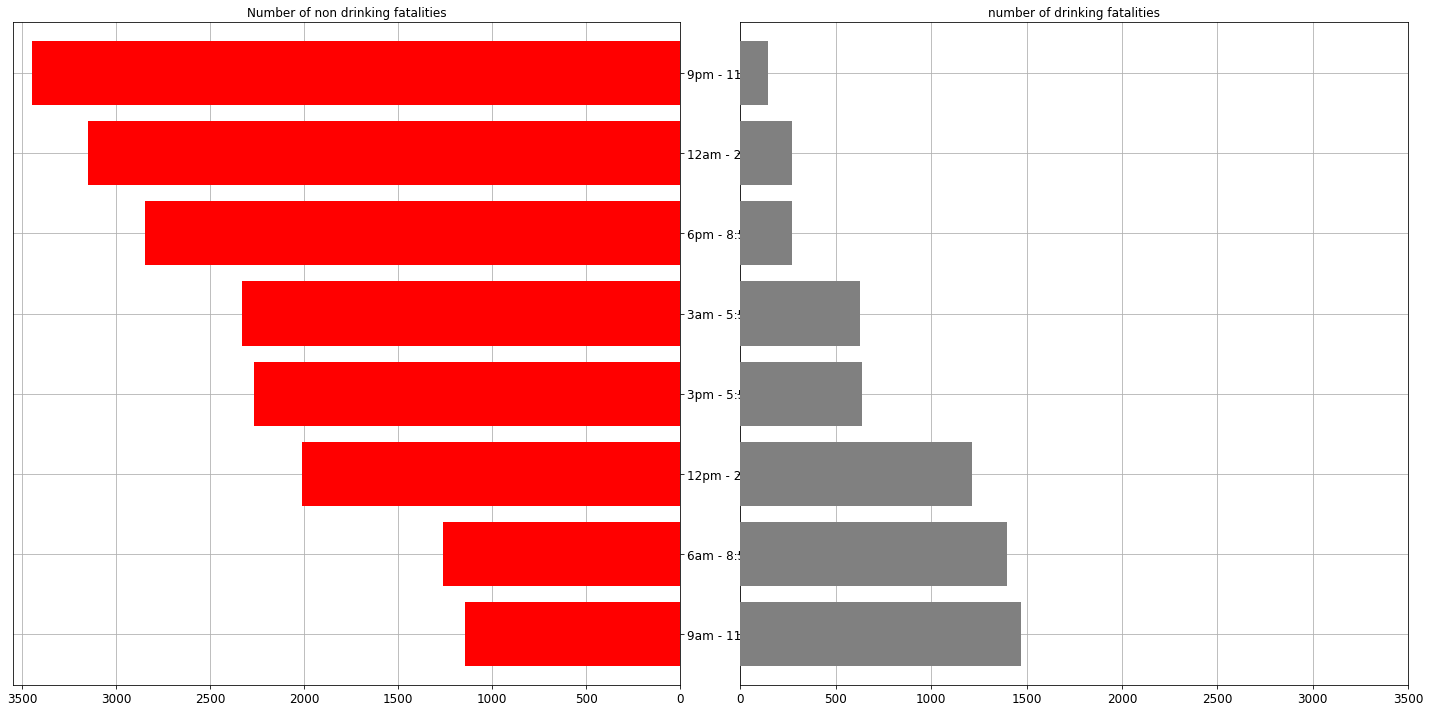

In [38]:
x = list(dict_times_not_drunk.values())
# print(x)
m = list(dict_times_drunk.values())
# print(m)
times = list(dict_times_drunk.keys())
values = np.array(x)
values_drunk = np.array(m)

# Sort by number of sales staff
idx = values_drunk.argsort()
times, values, values_drunk = [np.take(values, idx) for values in [times, values, values_drunk]]

y = np.arange(values.size)
z = np.arange(values_drunk.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, values, align='center', color='red', zorder=10)
axes[0].set_xticks(range(0, 4000, 500))
axes[0].set(title='Number of non drinking fatalities')
axes[1].barh(z, m, align='center', color='gray', zorder=10)
axes[1].set_xticks(range(0, 4000, 500))
axes[1].set_xlim(0,3500)
axes[1].set(title='number of drinking fatalities')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=times)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

#Used this link as referrence to plot the following graph: 
# https://stackoverflow.com/questions/27694221/using-python-libraries-to-plot-two-horizontal-bar-charts-sharing-same-y-axis

## HYPOTHESIS 4:

### As the day begins to get shorter due to daylight savings, more accidents occur between 4pm-7pm, since it gets dark earlier.

#### First we will check if more accidents occur between 4pm - 7pm

In [39]:
accident_dict = {}
for year in range(2010,2020):
    person_year = a.read_file(year, "PERSON")
    accident_dict[year] = person_year

In [50]:
year = int(input("Enter the year:\n"))

Enter the year:
2012


Text(0.5, 0, 'Hours')

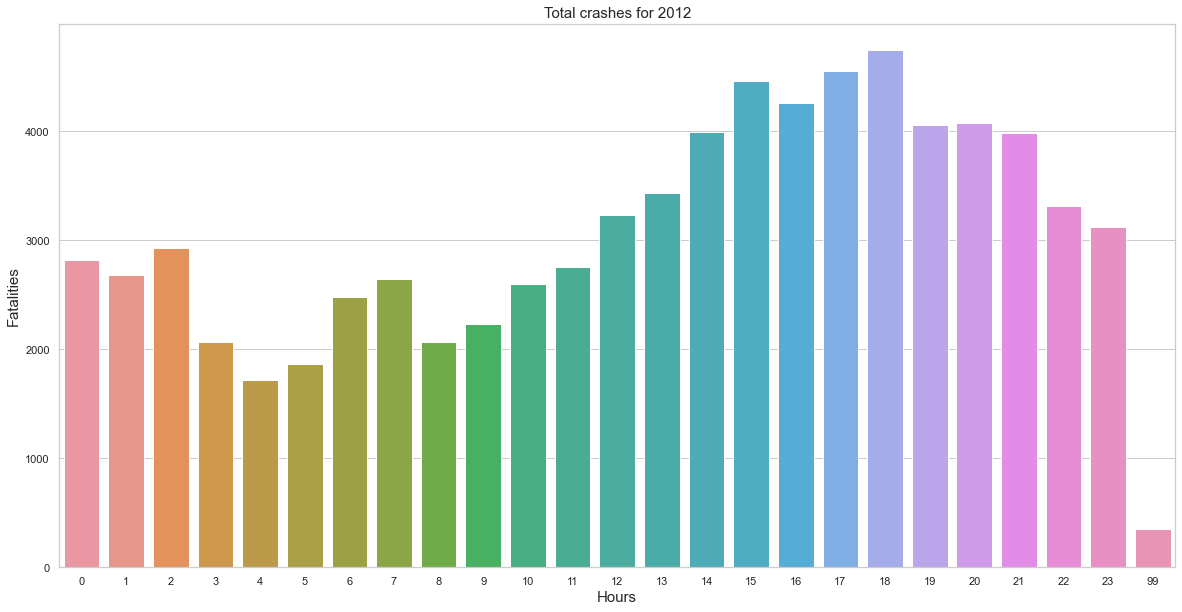

In [51]:
a = accident_dict[year].groupby(by = "HOUR").count()
a["hours"] = a.index
a1 = list(a.index)
sns.set(style="whitegrid")
ax = sns.barplot(x = "hours", y = "STATE", data=a)
plt.title('Total crashes for {}'.format(year), fontsize = 15)
plt.ylabel('Fatalities', fontsize = 15)
plt.xlabel('Hours', fontsize = 15)

##### The above graph shows that most fatalities happen during 3pm- 9pm

### COUNT OF FATALITIES BASED ON EACH MONTH BETWEEN 3PM - 9PM

In [52]:
accident_year = accident_dict[year]
accident_year = accident_year[['HOUR', 'MONTH', 'STATE']].copy()
accident_year = accident_year[(accident_year['HOUR']>=15) & (accident_year['HOUR']<=21)]
no_daylights=[11,12,1,2,3]

no_daylight_df = accident_year[accident_year['MONTH'].isin(no_daylights)]
no_daylight_df = no_daylight_df[['HOUR','STATE']]
daylight_df = accident_year[accident_year['MONTH'].isin(range(4,11))]
daylight_df = daylight_df[['HOUR', 'STATE']]

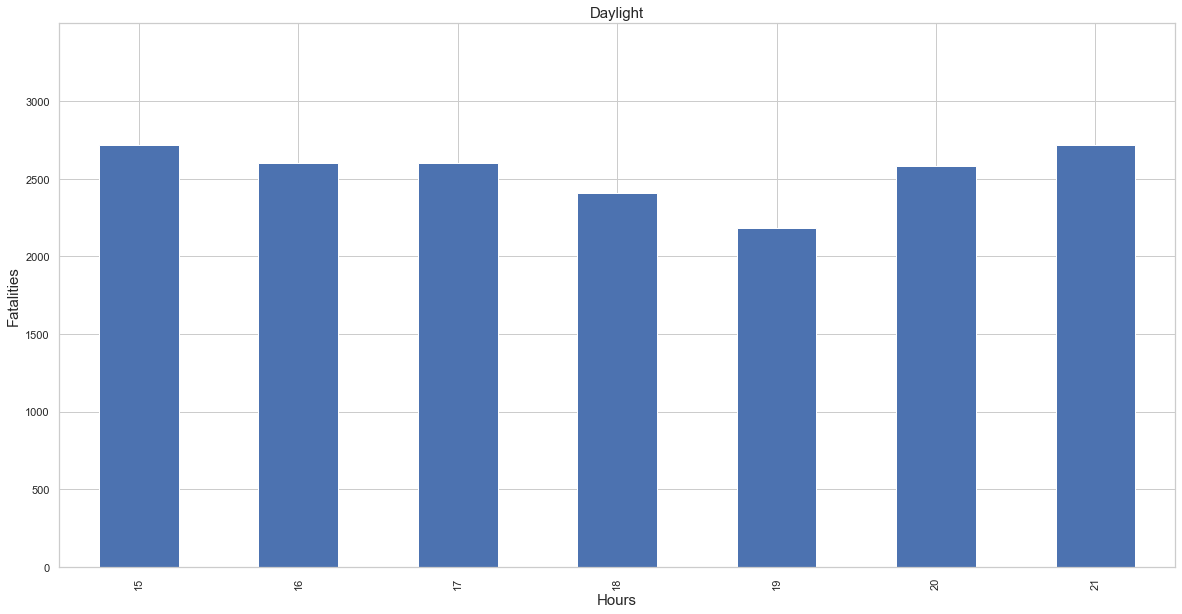

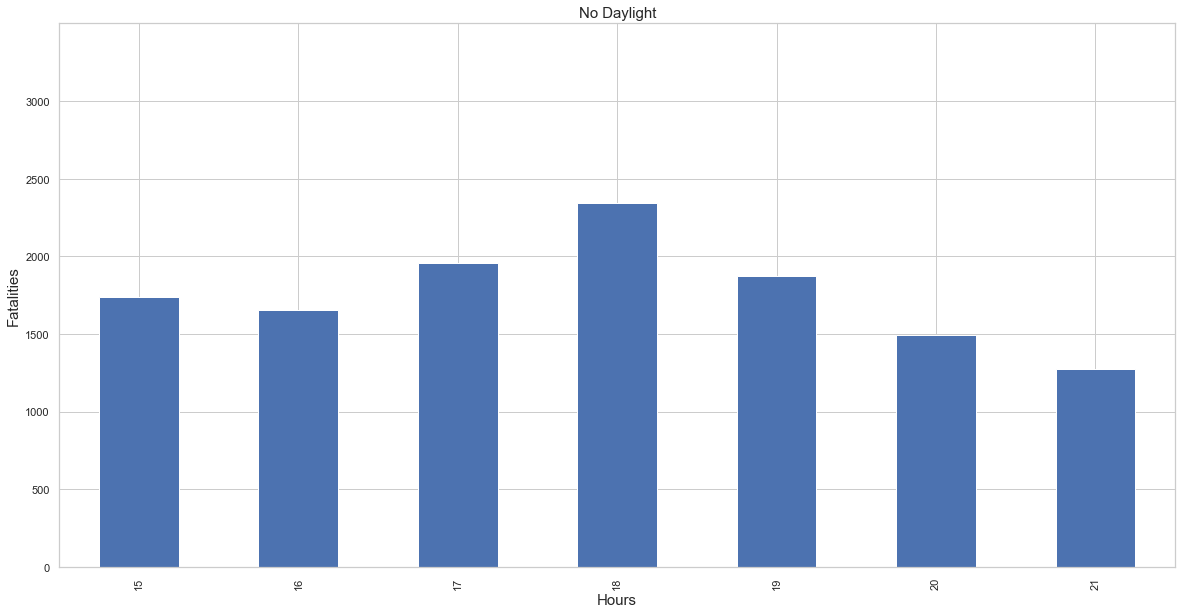

In [53]:
def group_by_plot_bar(df_list, df_name_list):
    for i in range(0,2):
        df_counts = df_list[i].groupby(['HOUR']).count()
        df_counts.reset_index(inplace = True)
        df_counts.groupby(['HOUR']).mean().plot(kind='bar', legend=False, layout=(i,0))
        plt.yticks(range(0,3500,500))
        plt.ylim(0,3500)
        plt.title("{}".format(df_name_list[i]), fontsize = 15)
        plt.xlabel("Hours", fontsize = 15)
        plt.ylabel("Fatalities", fontsize = 15)
    plt.show()
group_by_plot_bar([daylight_df, no_daylight_df], ["Daylight", "No Daylight"])

## Hypothesis 5:

### Fatalities are less in vehicles where airbags are deployed

In [54]:
airbag = dataframes_dict_airbag[year]
airbag = airbag[(airbag["PER_TYP"]==1) | (airbag["PER_TYP"]==2) | (airbag["PER_TYP"]==3) | (airbag["PER_TYP"]==9)]
airbag = airbag[(airbag["INJ_SEV"] == 4) | (airbag["INJ_SEV"] == 2)]
airbag = airbag[(airbag["SEAT_POS"] == 11) | (airbag["SEAT_POS"] == 13)]
airbag = airbag[(airbag["AIR_BAG"] == 1) | (airbag["AIR_BAG"] == 20) | (airbag["AIR_BAG"] == 8) ]

In [55]:
y_20 = airbag[airbag["AIR_BAG"]==20].count()
y_1_8 = airbag[(airbag["AIR_BAG"]==1) | (airbag["AIR_BAG"]==8) ].count()

In [59]:
fatalities_noairbag = y_20["INJ_SEV"]
fatalities_noairbag= int(fatalities_noairbag)

In [60]:
fatalities_airbag = y_1_8["INJ_SEV"]
fatalities_airbag = int(fatalities_airbag)

In [61]:
airbag = ["fatalities with airbag", "fatalities with no airbag"]
values = [fatalities_airbag, fatalities_noairbag]

<BarContainer object of 2 artists>

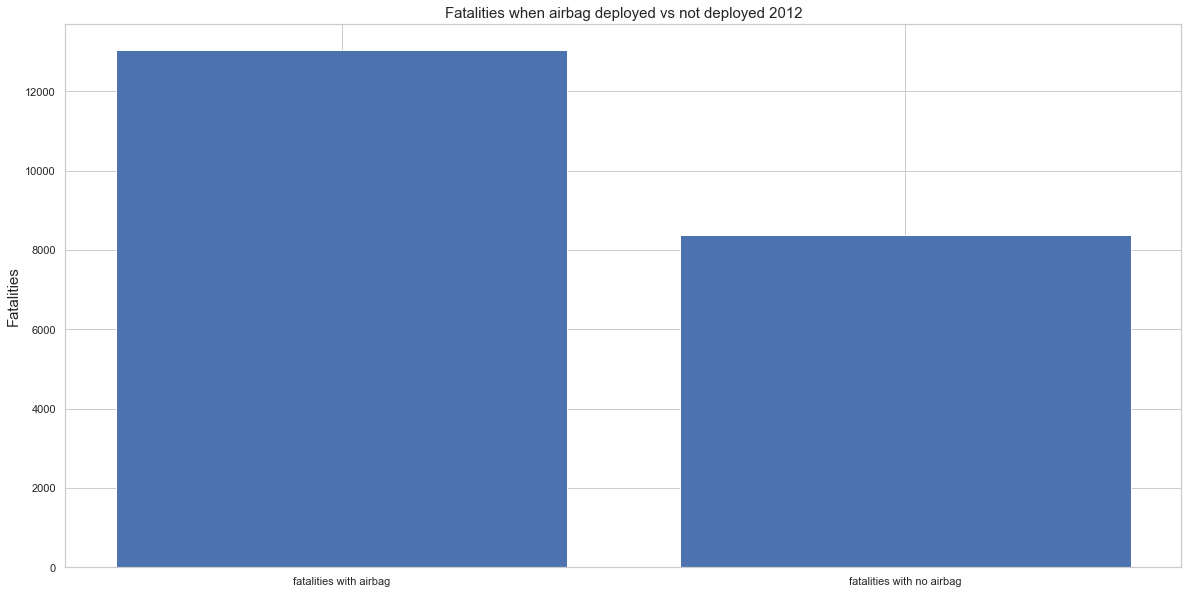

In [62]:
fig, ax = plt.subplots()
ax.set_ylabel('Fatalities', fontsize = 15)
ax.set_title('Fatalities when airbag deployed vs not deployed {}'.format(year), fontsize = 15)
plt.bar(airbag, values)